In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from skimage import io

def show (img):
    io.imshow(img)
    plt.show()

def showLog (img):
    io.imshow(np.log(img))
    plt.show()

In [2]:
import sys
TD1AbsolutePath = "../TP1/"
sys.path.append(TD1AbsolutePath)

import PSpy
import WhiteICA
import numpy as np


inputDirectory = "../img/"
resultsDirectory = "./res/"
resultsTD1Directory = "../TP1/res/"

averagePSResultsFileName = resultsTD1Directory + "averagePS.hdf5"

whiteningFiltersFigureFileName = resultsDirectory + "whiteningFilters.png"
whiteningFiltersResultsFileName = resultsDirectory + "whiteningFilters.hdf5"

averagePS1FigureFileName = resultsDirectory +"averagePS1.png"
averagePS4FigureFileName = resultsDirectory +"averagePS4.png"

averagePS1ResultsFileName = resultsDirectory +"averagePS1.hdf5"
averagePS4ResultsFileName = resultsDirectory +"averagePS4.hdf5"

averagePS1RadialResultsFileName = resultsDirectory + "averagePS1Radial.hdf5"
averagePS4RadialResultsFileName = resultsDirectory + "averagePS4Radial.hdf5"

averagePS1RadialFigureFileName = resultsDirectory + "averagePS1Radial.png"
averagePS4RadialFigureFileName = resultsDirectory + "averagePS4Radial.png"

ICResultsFileName = resultsDirectory +  "IC.hdf5"
ICFigureFileName = resultsDirectory + "IC.png"

sampleSize = [64, 64]
ICASampleSize = [12, 12]
ICANSamples = 150 # 50000

In [3]:
averagePS = PSpy.readH5(averagePSResultsFileName, 'averagePS')
maxPS = np.max(averagePS)

In [4]:
noiseVarianceList = [maxPS*10**(-9), maxPS*10**(-8), maxPS*10**(-7), maxPS*10**(-6)]

In [5]:
whiteningFilters = []
for noiseVariance in noiseVarianceList:
    whiteningFilters.append(WhiteICA.getPowerSpectrumWhiteningFilter(averagePS, noiseVariance))

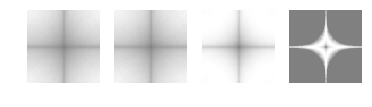

In [6]:
PSpy.saveH5(whiteningFiltersResultsFileName, 'whiteningFilters', np.array(whiteningFilters))
WhiteICA.makeWhiteningFiltersFigure(whiteningFilters, whiteningFiltersFigureFileName)

In [7]:
whiteningFilter = whiteningFilters[1];
averagePS1 = WhiteICA.getAveragePSWhitenImages(inputDirectory, sampleSize, whiteningFilter)

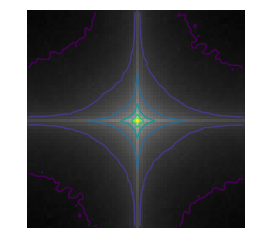

In [8]:
PSpy.saveH5(averagePS1ResultsFileName, 'averagePS', averagePS1)
PSpy.makeAveragePSFigure(averagePS1, averagePS1FigureFileName)

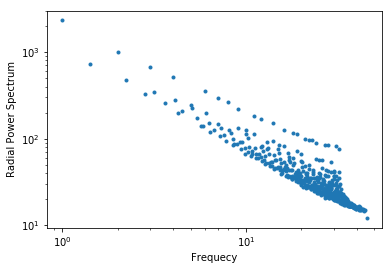

In [9]:
averagePS1Radial = PSpy.getRadialPS(averagePS1)
radialFreq = PSpy.getRadialFreq(averagePS1.shape)
PSpy.saveH5(averagePS1RadialResultsFileName, 'averagePSRadial', averagePS1Radial)
PSpy.makeAveragePSRadialFigure(radialFreq, averagePS1Radial, averagePS1RadialFigureFileName)

In [10]:
X = WhiteICA.getICAInputData(inputDirectory, ICASampleSize, ICANSamples)
X = WhiteICA.preprocess(X)
C = WhiteICA.getIC(X)

../img/image346.png
../img/image121.png
../img/image396.png
../img/image466.png
../img/image258.png
../img/image75.png
../img/image492.png
../img/image515.png
../img/image271.png
../img/image141.png
../img/image577.png
../img/image519.png
../img/image497.png
../img/image424.png
../img/image69.png
../img/image276.png
../img/image143.png
../img/image518.png
../img/image181.png
../img/image316.png
../img/image159.png
../img/image318.png
../img/image572.png
../img/image472.png
../img/image584.png
../img/image48.png
../img/image377.png
../img/image319.png
../img/image211.png
../img/image21.png
../img/image143.png
../img/image229.png
../img/image146.png
../img/image2.png
../img/image418.png
../img/image556.png
../img/image188.png
../img/image379.png
../img/image126.png
../img/image50.png
../img/image467.png
../img/image382.png
../img/image67.png
../img/image263.png
../img/image403.png
../img/image432.png
../img/image437.png
../img/image568.png
../img/image527.png
../img/image174.png
../img/i

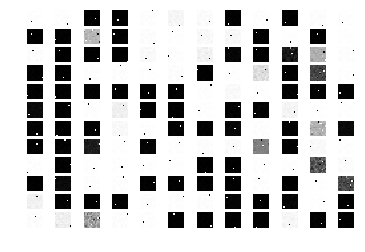

In [11]:
PSpy.saveH5(ICResultsFileName, 'IC', C)
WhiteICA.makeIdependentComponentsFigure(C, ICASampleSize, ICFigureFileName)

In [12]:
D = C.reshape([-1,]+ICASampleSize)

In [13]:
D.shape

(150L, 12L, 12L)

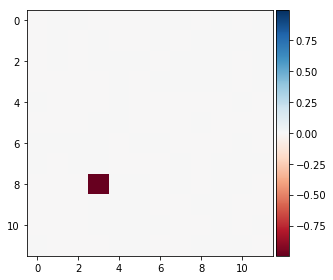

In [14]:
show(D[0])